In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Step 1: Create a quantum circuit with 2 qubits (representing two triboelectric materials)
qc = QuantumCircuit(2)


In [3]:

# Step 2: Initialize both qubits in the |0> state (representing neutral charge before contact)
qc.initialize([1, 0], 0)  # Qubit 0 (material 1)
qc.initialize([1, 0], 1)  # Qubit 1 (material 2)


In [4]:

# Step 3: Apply a Hadamard gate to both qubits to simulate superposition (representing charge distribution between the materials)
# This step represents the contact phase, where charge transfer starts between the materials
qc.h(0)
qc.h(1)


In [5]:

# Step 4: Apply a Pauli-X gate to qubit 0 to simulate charge separation (representing triboelectric charge buildup on material 1)
# This gate flips the qubit, representing the movement of charges to material 1
qc.x(0)


In [6]:

# Step 5: Apply a Phase gate to simulate the energy increase due to the charge buildup during separation
# This phase shift represents the energy generated by the triboelectric effect
qc.p(np.pi / 2, 0)


In [7]:

# Step 6: Apply another Pauli-X gate to qubit 1 to simulate charge buildup on material 2
# This gate represents the charge accumulation on the other material
qc.x(1)


In [8]:

# Step 7: Apply another Phase gate to qubit 1 to simulate energy buildup from the charge difference
qc.p(np.pi / 4, 1)



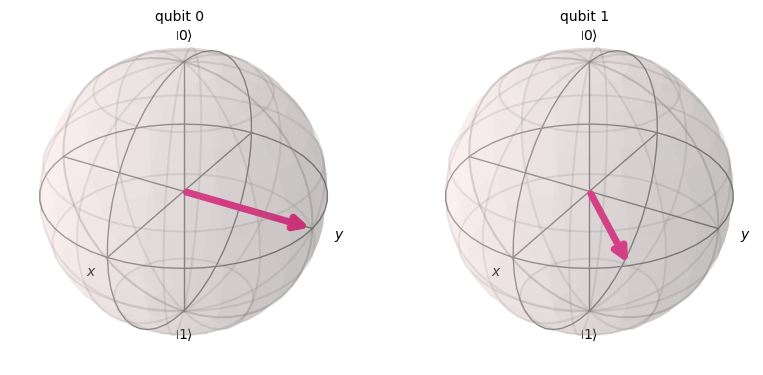

In [9]:
# Step 8: Visualize the qubits' states on the Bloch sphere to observe the charge distribution and energy states
final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [10]:
# Step 9: Measure both qubits to observe the final charge states (representing the electrical energy output of the TENG)
qc.measure_all()



In [11]:
# Step 10: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)



Measurement results: {'11': 285, '10': 238, '00': 246, '01': 255}


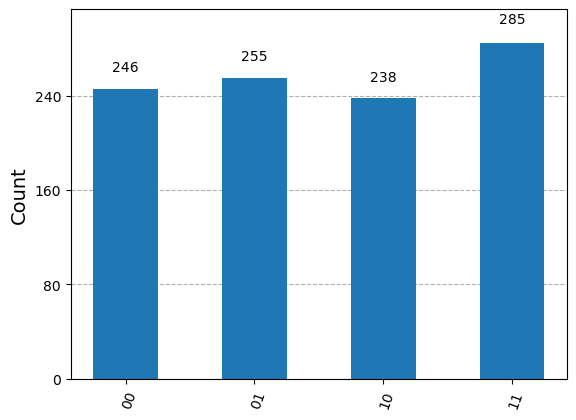

In [12]:
# Print the measurement results and plot the histogram (representing the final state of charge distribution in the TENG)
print(f"Measurement results: {counts}")
plot_histogram(counts)



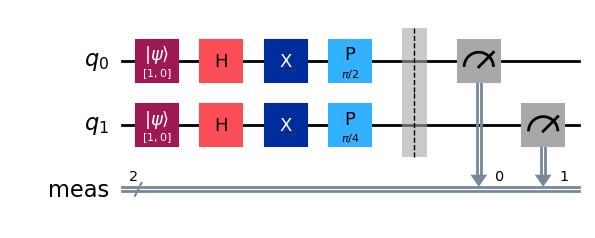

In [13]:
# Draw the quantum circuit
qc.draw(output='mpl')